# Single Exponential Smoothing -- SES


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [17]:
data=pd.read_csv(r"C:\Users\User\Desktop\Python Code\Time Series - IMS Student\Python\ES Model\Maida_Sales.csv")
data

,Date,value
0,01-01-2017,240
1,01-02-2017,260
2,01-03-2017,220
3,01-04-2017,310
4,01-05-2017,240
5,01-06-2017,240
6,01-07-2017,260
7,01-08-2017,230
8,01-09-2017,320
9,01-10-2017,240


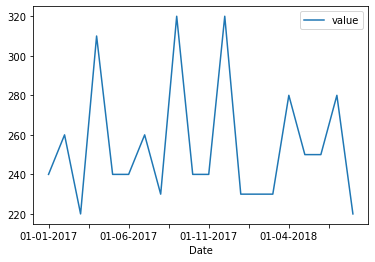

In [3]:
data.plot.line(x = 'Date',y = 'value')
plt.show()  # Pattern = Random

In [4]:
data2=data.set_index("Date")
data2.head()

,value
Date,
01-01-2017,240
01-02-2017,260
01-03-2017,220
01-04-2017,310
01-05-2017,240


# Model 

In [5]:
model = SimpleExpSmoothing(data2,initialization_method='known',initial_level=240).fit(smoothing_level=0.4, optimized=False)
model.params

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 0.4,
 'smoothing_trend': None,
 'smoothing_seasonal': None,
 'damping_trend': nan,
 'initial_level': 240.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [18]:
model.fittedvalues

Date
01-01-2017    240.000000
01-02-2017    240.000000
01-03-2017    248.000000
01-04-2017    236.800000
01-05-2017    266.080000
01-06-2017    255.648000
01-07-2017    249.388800
01-08-2017    253.633280
01-09-2017    244.179968
01-10-2017    274.507981
01-11-2017    260.704788
01-12-2017    252.422873
01-01-2018    279.453724
01-02-2018    259.672234
01-03-2018    247.803341
01-04-2018    240.682004
01-05-2018    256.409203
01-06-2018    253.845522
01-07-2018    252.307313
01-08-2018    263.384388
dtype: float64

In [7]:
fcast1 = model.forecast(4).rename(r"$\alpha=0.2$")
fcast1  

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


20    246.030633
21    246.030633
22    246.030633
23    246.030633
Name: $\alpha=0.2$, dtype: float64

#### Forecast Plot

<AxesSubplot:xlabel='Date'>

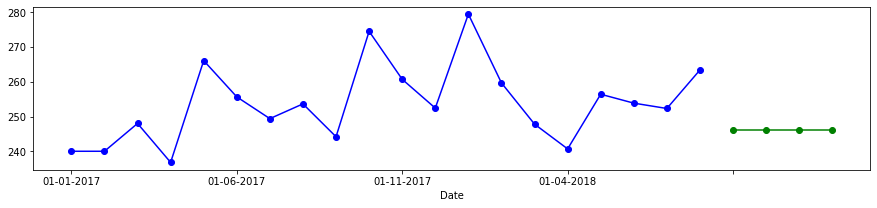

In [33]:
# plot
fcast1.plot(marker='o', color='green')
model.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

In [16]:
data2["Forecast"]=model.fittedvalues
data2.head(10)

,value,Forecast
Date,,
01-01-2017,240,240.000000
01-02-2017,260,240.000000
01-03-2017,220,248.000000
01-04-2017,310,236.800000
01-05-2017,240,266.080000
01-06-2017,240,255.648000
01-07-2017,260,249.388800
01-08-2017,230,253.633280
01-09-2017,320,244.179968


#### Accuracy of Model

In [19]:
mean_absolute_percentage_error = np.mean(np.abs(data2.value - data2.Forecast)/np.abs(data2.value))*100
mean_absolute_percentage_error

11.674513944211187

# Auto model 

In [30]:
data=pd.read_csv(r"C:\Users\User\Desktop\Python Code\Time Series - IMS Student\Python\ES Model\Maida_Sales.csv")
data.head(10)

,Date,value
0,01-01-2017,240
1,01-02-2017,260
2,01-03-2017,220
3,01-04-2017,310
4,01-05-2017,240
5,01-06-2017,240
6,01-07-2017,260
7,01-08-2017,230
8,01-09-2017,320
9,01-10-2017,240


In [31]:
data2=data.set_index("Date")
data2.head()

,value
Date,
01-01-2017,240
01-02-2017,260
01-03-2017,220
01-04-2017,310
01-05-2017,240


In [32]:
fit_auto= SimpleExpSmoothing(data2).fit(optimized=True)
fit_auto.params

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


{'smoothing_level': 1.490230954086417e-08,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 254.49999237405342,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [26]:
data2["Forecast"]=fit_auto.fittedvalues
data2.head()

,value,Forecast
Date,,
01-01-2017,240,254.499992
01-02-2017,260,254.499992
01-03-2017,220,254.499992
01-04-2017,310,254.499992
01-05-2017,240,254.499993


#### Accuracy of Model

In [27]:
mean_absolute_percentage_error = np.mean(np.abs(data2.value - data2.Forecast)/np.abs(data2.value))*100
mean_absolute_percentage_error

9.45332122158448

#### Auto model is best 